In [19]:
import numpy as np

In [2]:
import json, math, random
import pandas as pd

DATASET = "dataset_embeddings_compact.csv"

# 12-dim baseline labels (same order we built them)
DIM_LABELS = [
    "count_pois",               # 0
    "mean_distance",            # 1
    "min_distance",             # 2
    "max_distance",             # 3
    "median_distance",          # 4
    "std_distance",             # 5
    "mean_inverse_distance",    # 6
    "max_inverse_distance",     # 7
    "sum_inverse_distance",     # 8
    "ratio_within_near_radius", # 9   (<= R1)
    "ratio_within_mid_radius",  # 10  (<= R2)
    "ratio_within_far_radius",  # 11  (<= R3)
]

POI_KEYS = [
    "emb_sport_and_leisure","emb_medical","emb_education_prim","emb_veterinary",
    "emb_food_and_drink_stores","emb_arts_and_entertainment","emb_food_and_drink",
    "emb_park_like","emb_security","emb_religion","emb_education_sup",
]
MB_KEYS = ["emb_metro", "emb_bus"]

def parse_json_list(v):
    """Return Python list from JSON/text, or None if missing/bad."""
    if v is None: return None
    if isinstance(v, float) and math.isnan(v): return None
    if isinstance(v, list): return v
    try:
        return json.loads(v)
    except Exception:
        return None

def print_vector(name, vec):
    """Pretty-print a 12-dim vector with labels; handle None gracefully."""
    if vec is None:
        print(f"  {name}: None")
        return
    if len(vec) != 12:
        print(f"  {name}: length={len(vec)} (expected 12) -> {vec}")
        return
    print(f"  {name}:")
    for i, (label, val) in enumerate(zip(DIM_LABELS, vec)):
        # Count as int; rest as float
        if i == 0:
            try:
                print(f"    dim{i:02d}: {label:<25} = {int(val)}")
            except Exception:
                print(f"    dim{i:02d}: {label:<25} = {val}")
        else:
            print(f"    dim{i:02d}: {label:<25} = {float(val):.6f}")


In [3]:
df = pd.read_csv(DATASET)
df["id"] = pd.to_numeric(df["id"], errors="coerce").astype("Int64")
print("Rows:", len(df), "Cols:", len(df.columns))
display(df.head(2))


Rows: 25215 Cols: 40


,id,monto,superficie_t,dormitorios,dormitorios_faltante,banos,banos_faltante,antiguedad,antiguedad_faltante,Or_N,...,emb_veterinary,emb_food_and_drink_stores,emb_arts_and_entertainment,emb_food_and_drink,emb_park_like,emb_security,emb_religion,emb_education_sup,emb_metro,emb_bus
0,1548097259,11200,92.0,2,0,2,0,1,0,0,...,"[1.0, 579.3739013671875, 579.3739013671875, 57...","[12.0, 528.0105369885763, 26.096040725708008, ...","[25.0, 1581.808360595703, 255.53167724609375, ...","[25.0, 419.6531335449219, 172.73153686523438, ...","[6.0, 493.31689453125, 265.3938903808594, 599....","[7.0, 1969.0926862444196, 1354.3077392578125, ...","[3.0, 504.3206278483073, 455.2417297363281, 58...","[7.0, 1452.850838797433, 781.4993896484375, 18...",NaN,"[8.0, 252.7959213256836, 136.25413513183594, 3..."
1,2732119230,17490,275.0,3,0,4,0,2,0,0,...,"[1.0, 761.529296875, 761.529296875, 761.529296...","[10.0, 491.62200317382815, 150.35333251953125,...","[24.0, 1546.2690048217773, 284.37957763671875,...","[24.0, 340.82357088724774, 109.64118957519531,...","[3.0, 441.74968973795575, 251.0115203857422, 5...","[7.0, 2130.9099644252233, 1559.4659423828125, ...","[1.0, 297.7435607910156, 297.7435607910156, 29...","[7.0, 1511.268345424107, 979.7745971679688, 18...",NaN,"[11.0, 270.19501426003194, 152.1919708251953, ..."


In [4]:
# Pick a random apartment id
row = df.sample(1, random_state=None).iloc[0]
aid = int(row["id"])
print(f"Apartment ID: {aid}\n")

# Print each POI class
for col in POI_KEYS:
    if col in df.columns:
        vec = parse_json_list(row.get(col))
        print_vector(col, vec)
    else:
        print(f"  {col}: (column missing)")
print()

# Print Metro & Bus
for col in MB_KEYS:
    if col in df.columns:
        vec = parse_json_list(row.get(col))
        print_vector(col, vec)
    else:
        print(f"  {col}: (column missing)")


Apartment ID: 2858928802

  emb_sport_and_leisure:
    dim00: count_pois                = 13
    dim01: mean_distance             = 661.426163
    dim02: min_distance              = 105.236740
    dim03: max_distance              = 1186.323853
    dim04: median_distance           = 736.901794
    dim05: std_distance              = 377.007814
    dim06: mean_inverse_distance     = 0.003039
    dim07: max_inverse_distance      = 0.009502
    dim08: sum_inverse_distance      = 0.039513
    dim09: ratio_within_near_radius  = 0.384615
    dim10: ratio_within_mid_radius   = 1.000000
    dim11: ratio_within_far_radius   = 1.000000
  emb_medical:
    dim00: count_pois                = 36
    dim01: mean_distance             = 1465.229043
    dim02: min_distance              = 130.676239
    dim03: max_distance              = 2393.833740
    dim04: median_distance           = 1623.140015
    dim05: std_distance              = 716.445348
    dim06: mean_inverse_distance     = 0.001435
    dim07:

In [5]:
APT_ID = None  # put an integer id here to force a specific apt (e.g., 1540798899)

if APT_ID is not None:
    hit = df.loc[df["id"] == APT_ID]
    if hit.empty:
        print(f"id {APT_ID} not found")
    else:
        row = hit.iloc[0]
        aid = int(row["id"])
        print(f"Apartment ID: {aid}\n")
        for col in POI_KEYS:
            vec = parse_json_list(row.get(col))
            print_vector(col, vec)
        print()
        for col in MB_KEYS:
            vec = parse_json_list(row.get(col))
            print_vector(col, vec)


### Exportar dataset expandido


In [7]:
import pandas as pd
import ast

# Load dataset
df = pd.read_csv("dataset_embeddings_compact.csv")

# Helper to unpack JSON-like embedding strings
def unpack_embedding(col, prefix):
    unpacked = df[col].dropna().apply(lambda x: ast.literal_eval(x))
    # Expand into a DataFrame (12 features per embedding)
    expanded = pd.DataFrame(unpacked.tolist(), index=unpacked.index)
    expanded.columns = [f"{prefix}_dim{str(i).zfill(2)}" for i in range(expanded.shape[1])]
    return expanded

# List of embedding columns
embedding_cols = [c for c in df.columns if c.startswith("emb_")]

# Unpack each embedding
expanded_dfs = []
for col in embedding_cols:
    prefix = col.replace("emb_", "")
    expanded_dfs.append(unpack_embedding(col, prefix))

# Merge expanded features into original df
df_expanded = df.copy()
for expanded in expanded_dfs:
    df_expanded = df_expanded.join(expanded)

print("✅ Expanded embeddings. Shape:", df_expanded.shape)
df_expanded.head(3)


✅ Expanded embeddings. Shape: (25215, 196)


,id,monto,superficie_t,dormitorios,dormitorios_faltante,banos,banos_faltante,antiguedad,antiguedad_faltante,Or_N,...,bus_dim02,bus_dim03,bus_dim04,bus_dim05,bus_dim06,bus_dim07,bus_dim08,bus_dim09,bus_dim10,bus_dim11
0,1548097259,11200,92.0,2,0,2,0,1,0,0,...,136.254135,366.600403,253.089211,95.353193,0.004645,0.007339,0.037163,0.500000,0.500000,1.0
1,2732119230,17490,275.0,3,0,4,0,2,0,0,...,152.191971,389.167419,289.900177,87.742871,0.004191,0.006571,0.046100,0.363636,0.545455,1.0
2,1592811585,12000,170.0,3,0,3,0,0,0,1,...,131.783295,358.006653,155.962280,91.915142,0.005821,0.007588,0.023284,0.750000,0.750000,1.0


In [ ]:
#df_expanded.to_csv("dataset_embeddings_extended.csv", index=False)

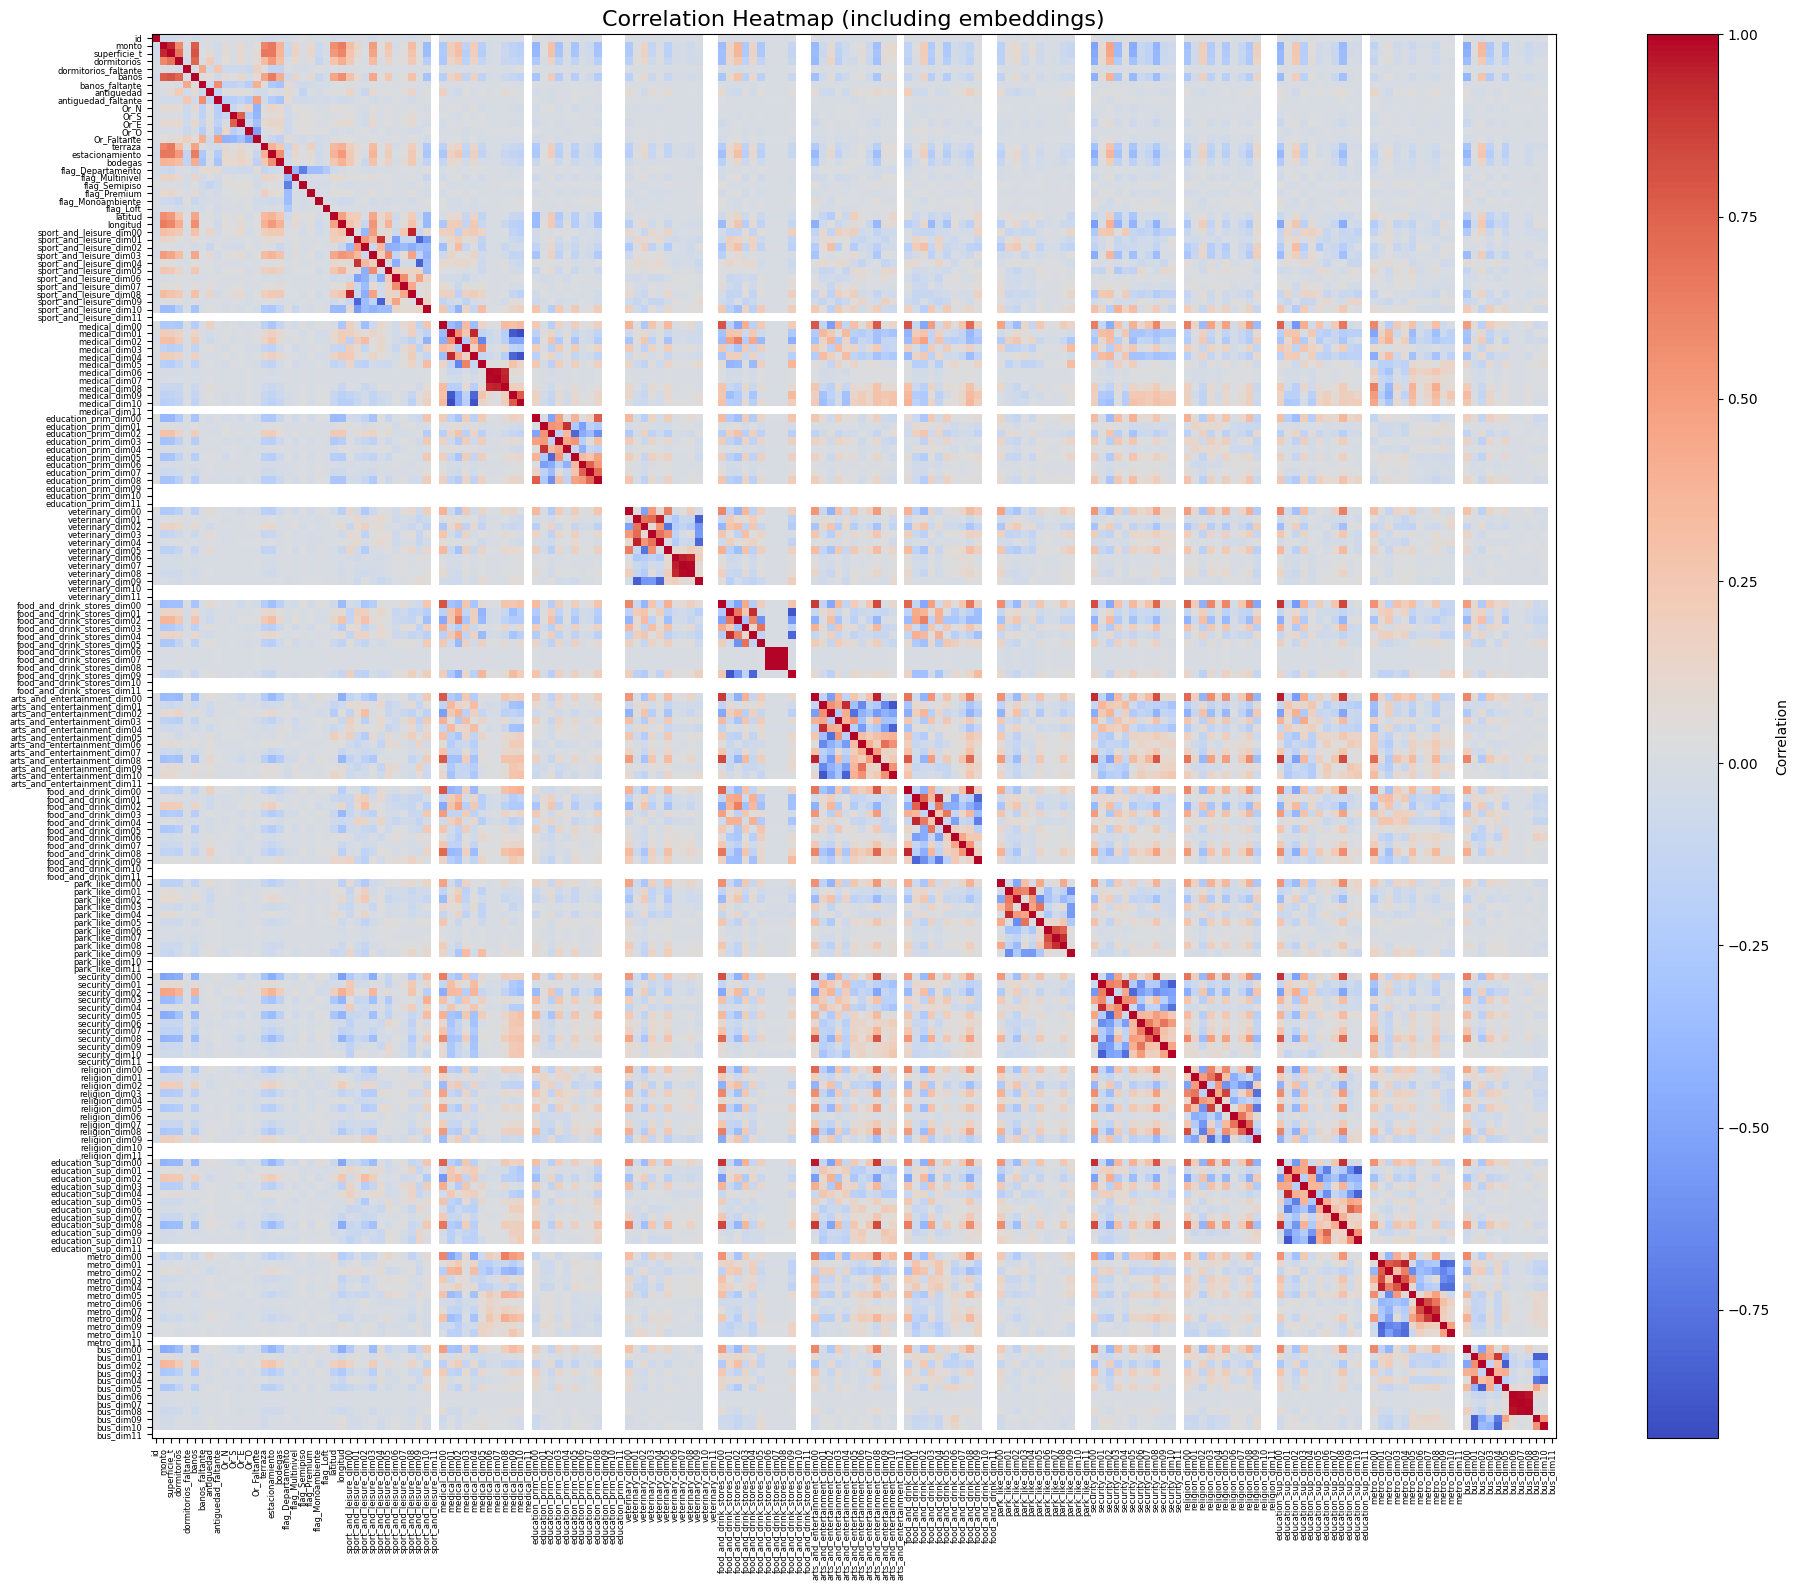

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Select only numeric columns for correlation
numeric_df = df_expanded.select_dtypes(include="number")

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Heatmap
plt.figure(figsize=(20, 16))
plt.imshow(corr_matrix, cmap="coolwarm", interpolation="nearest")
plt.colorbar(label="Correlation")
plt.title("Correlation Heatmap (including embeddings)", fontsize=16)
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=90, fontsize=6)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns, fontsize=6)
plt.tight_layout()
plt.show()
#plt.savefig("corr_matrix.svg")


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25215 entries, 0 to 25214
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          25215 non-null  int64  
 1   monto                       25215 non-null  int64  
 2   superficie_t                25215 non-null  float64
 3   dormitorios                 25215 non-null  int64  
 4   dormitorios_faltante        25215 non-null  int64  
 5   banos                       25215 non-null  int64  
 6   banos_faltante              25215 non-null  int64  
 7   antiguedad                  25215 non-null  int64  
 8   antiguedad_faltante         25215 non-null  int64  
 9   Or_N                        25215 non-null  int64  
 10  Or_S                        25215 non-null  int64  
 11  Or_E                        25215 non-null  int64  
 12  Or_O                        25215 non-null  int64  
 13  Or_Faltante                 252

In [ ]:
df_expanded.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25215 entries, 0 to 25214
Data columns (total 196 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    id                            int64  
 1    monto                         int64  
 2    superficie_t                  float64
 3    dormitorios                   int64  
 4    dormitorios_faltante          int64  
 5    banos                         int64  
 6    banos_faltante                int64  
 7    antiguedad                    int64  
 8    antiguedad_faltante           int64  
 9    Or_N                          int64  
 10   Or_S                          int64  
 11   Or_E                          int64  
 12   Or_O                          int64  
 13   Or_Faltante                   int64  
 14   terraza                       float64
 15   estacionamiento               int64  
 16   bodegas                       int64  
 17   flag_Departamento             int64  
 18   flag